### Importing the Necessary Libraries

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing

from datetime import datetime
import scipy.stats as stats
from scipy.stats import skew  
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

## for visualization
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

import sklearn.linear_model as linear_model
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install missingno

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
!pip install mlxtend

### Descriptive Analysis of Dataset
The dataset used is part of the [HDSC-Regression-in-machine-learning project] [https://drive.google.com/file/d/1Eru_UHVc3WLHVveC9Q8K9QUxlzYeHt18/view?usp=share_link]. The dataset used is the Appliances Energy Prediction data. The house temperature and humidity conditions of the house were monitored with a ZigBee wireless sensor network. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 


In [12]:
### Importing the dataset
Energy_prediction_data = pd.read_csv('energydata_complete.csv')

In [13]:
### Displaying the first few rows of  the data
Energy_prediction_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
## checking for the number of rows and columns
Energy_prediction_data.shape

(17709, 29)

#### The dataset has 17709 rows and 29 columns

In [16]:
### finding statistical description of the numerical variables
Energy_prediction_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,17709.0,97.290643,103.305708,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,17709.0,3.998532,8.103980,0.000000,0.000000,0.000000,0.000000,70.000000
T1,17709.0,21.432677,1.478209,16.790000,20.600000,21.390000,22.222500,26.260000
RH_1,17709.0,40.021264,3.826259,27.023333,37.200000,39.400000,42.790000,63.360000
T2,17709.0,20.039071,2.041041,16.100000,18.700000,19.700000,21.000000,29.856667
RH_2,17709.0,40.306043,3.908843,20.463333,37.915000,40.400000,43.090000,56.026667
T3,17709.0,21.928610,1.797587,17.200000,20.600000,21.884444,22.890000,29.100000
RH_3,17709.0,39.244276,3.248928,30.663333,36.805714,38.500000,41.764286,50.163333
T4,17709.0,20.516929,1.869423,15.100000,19.390000,20.390000,21.533333,26.200000
RH_4,17709.0,38.851616,4.311179,27.660000,35.368571,38.200000,41.900000,51.090000


In [17]:
### getting more information about the features
Energy_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17709 entries, 0 to 17708
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         17709 non-null  object 
 1   Appliances   17709 non-null  int64  
 2   lights       17709 non-null  int64  
 3   T1           17709 non-null  float64
 4   RH_1         17709 non-null  float64
 5   T2           17709 non-null  float64
 6   RH_2         17709 non-null  float64
 7   T3           17709 non-null  float64
 8   RH_3         17709 non-null  float64
 9   T4           17709 non-null  float64
 10  RH_4         17709 non-null  float64
 11  T5           17709 non-null  float64
 12  RH_5         17709 non-null  float64
 13  T6           17709 non-null  float64
 14  RH_6         17709 non-null  float64
 15  T7           17709 non-null  float64
 16  RH_7         17709 non-null  float64
 17  T8           17709 non-null  float64
 18  RH_8         17709 non-null  float64
 19  T9  

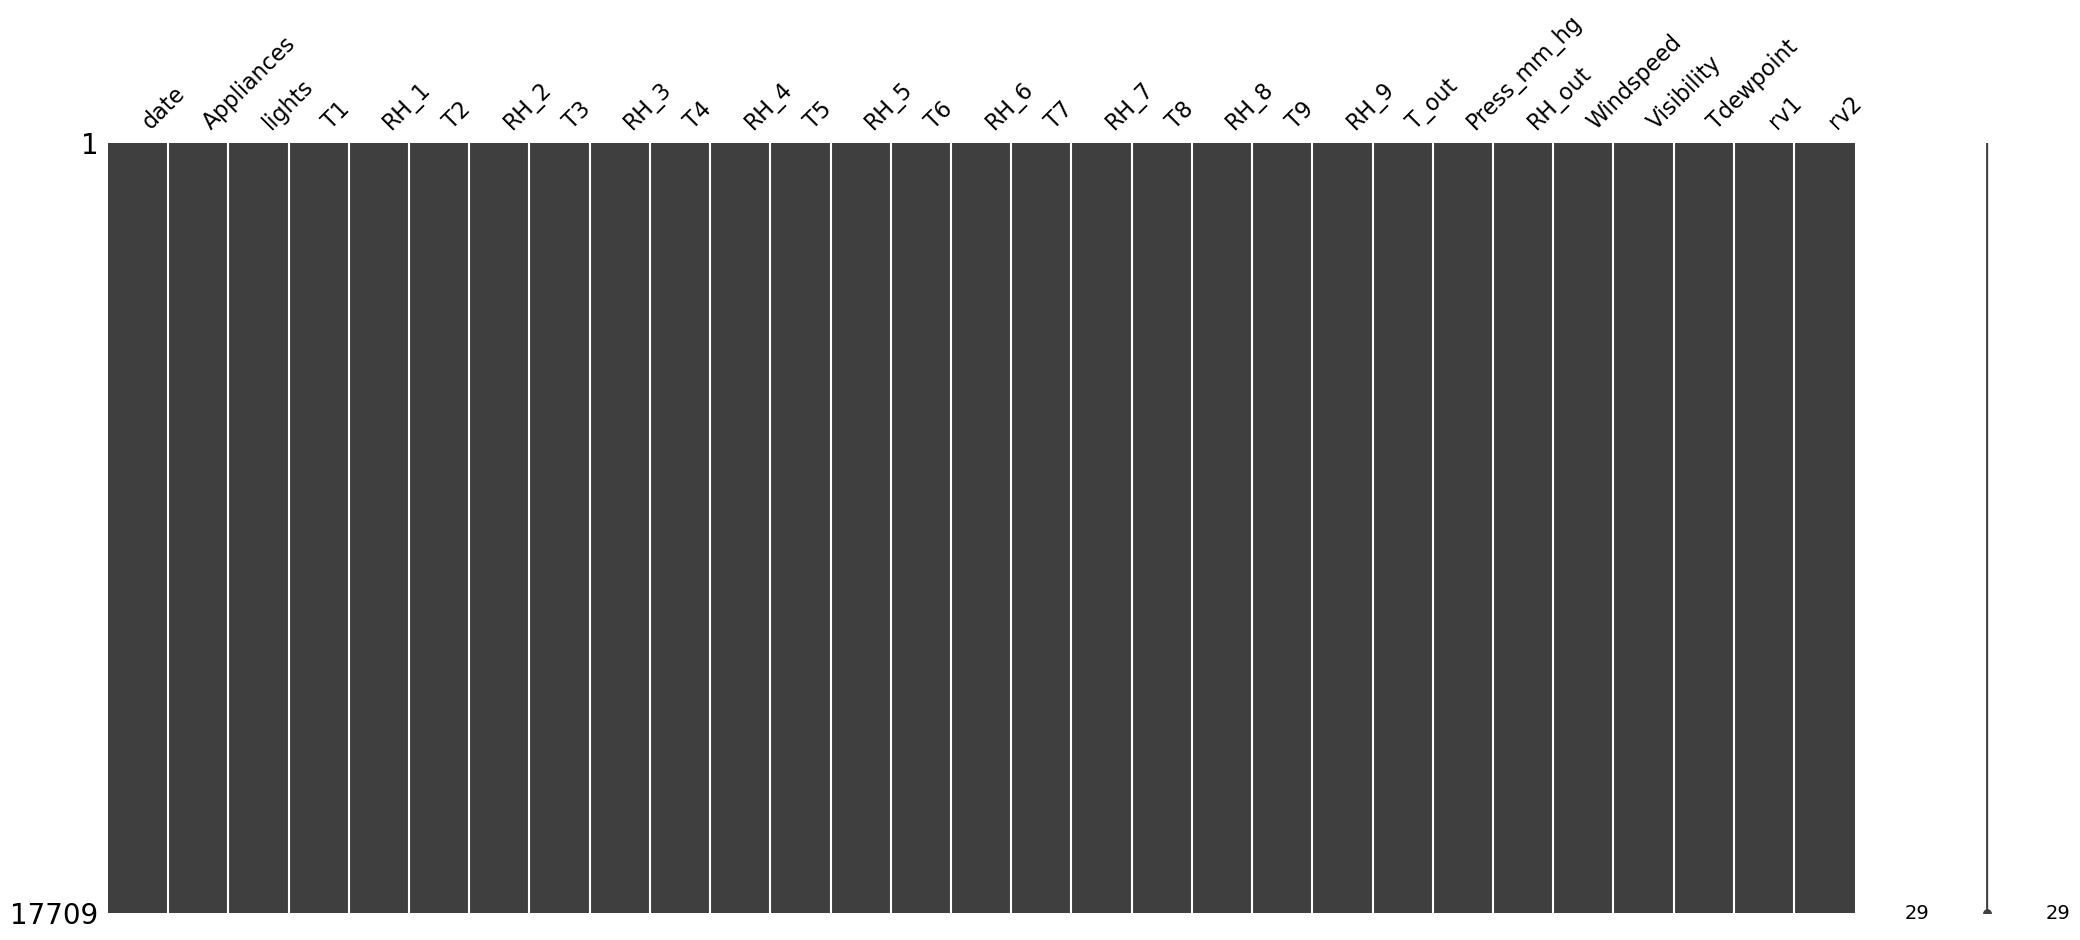

In [18]:
### Checking for missing values
msno.matrix(Energy_prediction_data);

### **Observations**
* There are 17709 rows and column
* The features are numerical except date
* There are no missing values


### *Visualizing the target variable: 'Appliances'*

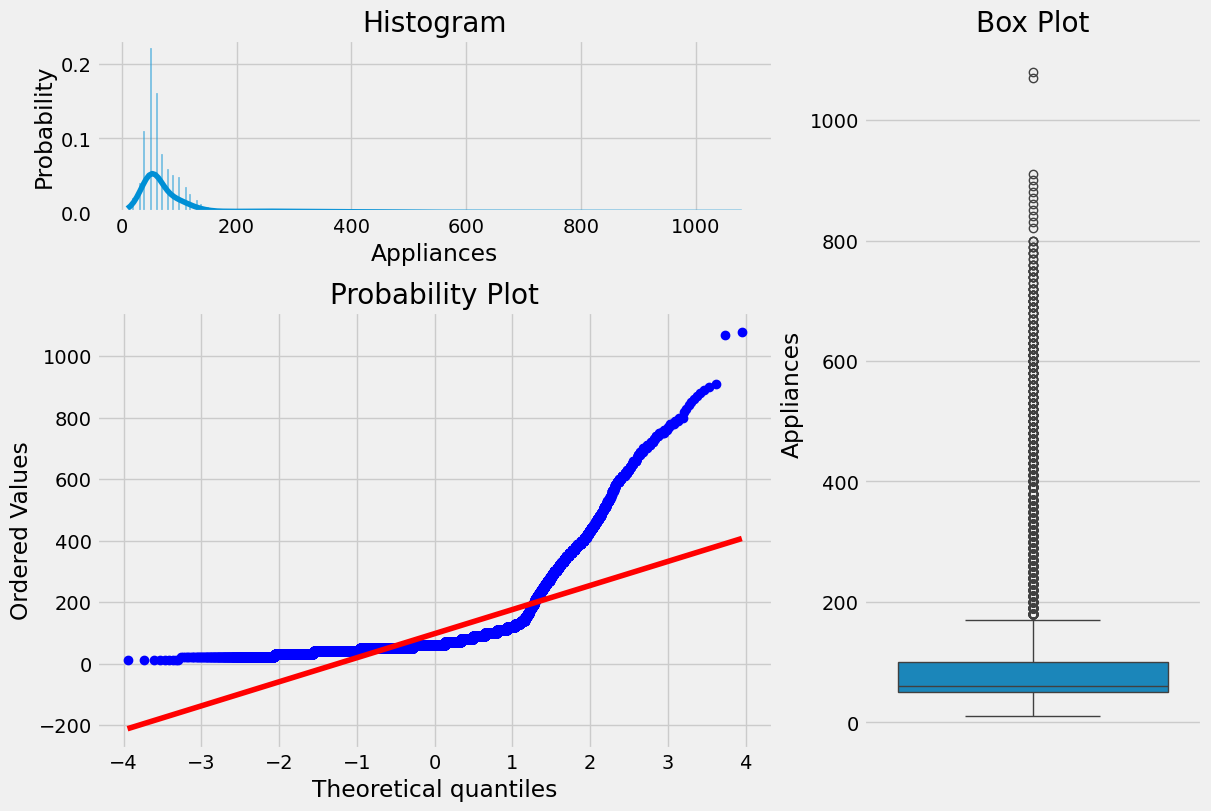

In [22]:
def Target_chart(df, feature):
    ## Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(layout='constrained', figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    # gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.histplot(data=df, x=feature, kde=True, ax = ax1, stat='probability')

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1:, :2])
    ## Set the title.
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot.
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 )

Target_chart(Energy_prediction_data, 'Appliances')

From the histogram above, we observe that the target variable is not normally distributed, it is positively skewed to the right. From the boxplot and probability plot, we can se two outliers

In [23]:
#checking the value of skewness and kurtosis
print("Skewness: " + str(Energy_prediction_data['Appliances'].skew()))
print("Kurtosis: " + str(Energy_prediction_data['Appliances'].kurt()))

Skewness: 3.377325357356253
Kurtosis: 13.577626910837175


### Checking the relationship between the featuresand the target variables
Before that we have to drop the date column as it wont help in any prediction

In [33]:
## dropping the date column
Energy_wo_date=Energy_prediction_data.drop('date', axis=1)
Energy_wo_date

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.530000,6.60,733.500000,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.560000,6.48,733.600000,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.500000,6.37,733.700000,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.400000,6.25,733.800000,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,60,40,19.89,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.400000,6.13,733.900000,92.0,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,100,0,26.10,42.800000,26.760000,38.090000,29.100000,38.238571,25.680000,42.116000,...,24.500000,42.395714,23.10,747.933333,45.0,6.666667,40.000000,10.5,18.363029,18.363029
17705,200,0,26.10,42.363333,26.700000,38.090000,28.997143,37.582857,25.600000,42.000000,...,24.500000,42.220000,23.10,747.966667,45.0,6.833333,40.000000,10.5,21.670478,21.670478
17706,350,0,26.10,42.030000,26.566667,38.060000,28.700000,37.036000,25.600000,41.960000,...,24.500000,41.782857,23.10,748.000000,45.0,7.000000,40.000000,10.5,49.184282,49.184282
17707,300,0,26.10,41.745000,26.500000,38.000000,28.765714,37.422857,25.600000,41.805714,...,24.500000,42.580000,23.10,748.016667,45.0,7.000000,40.000000,10.5,21.225869,21.225869


In [36]:
## Checking how the features related to the target variable
(Energy_wo_date.corr())["Appliances"].sort_values(ascending = False)[1:]

lights         0.211161
T2             0.105079
T6             0.098516
T3             0.082979
Windspeed      0.081877
T_out          0.079685
RH_1           0.079454
T1             0.050777
T8             0.037928
T4             0.033265
RH_3           0.033019
T7             0.018762
RH_4           0.006102
T5             0.004914
RH_5           0.002815
Tdewpoint      0.002421
T9             0.000830
Visibility    -0.003053
rv1           -0.009291
rv2           -0.009291
Press_mm_hg   -0.035046
RH_2          -0.056014
RH_9          -0.058070
RH_7          -0.068057
RH_6          -0.069399
RH_8          -0.110940
RH_out        -0.135351
Name: Appliances, dtype: float64

In [50]:
## Visualizing the relationship
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(Appliances)
    sns.scatterplot(y = y, x = x);

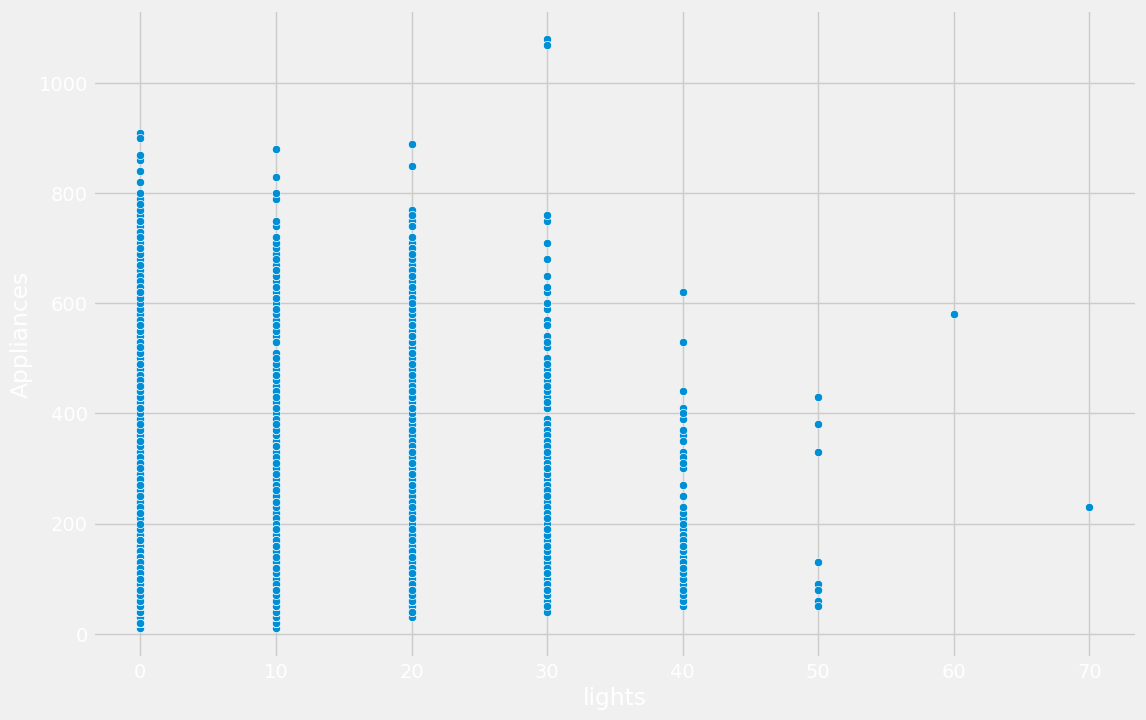

In [51]:
customized_scatterplot(Energy_wo_date.Appliances, Energy_wo_date.lights)

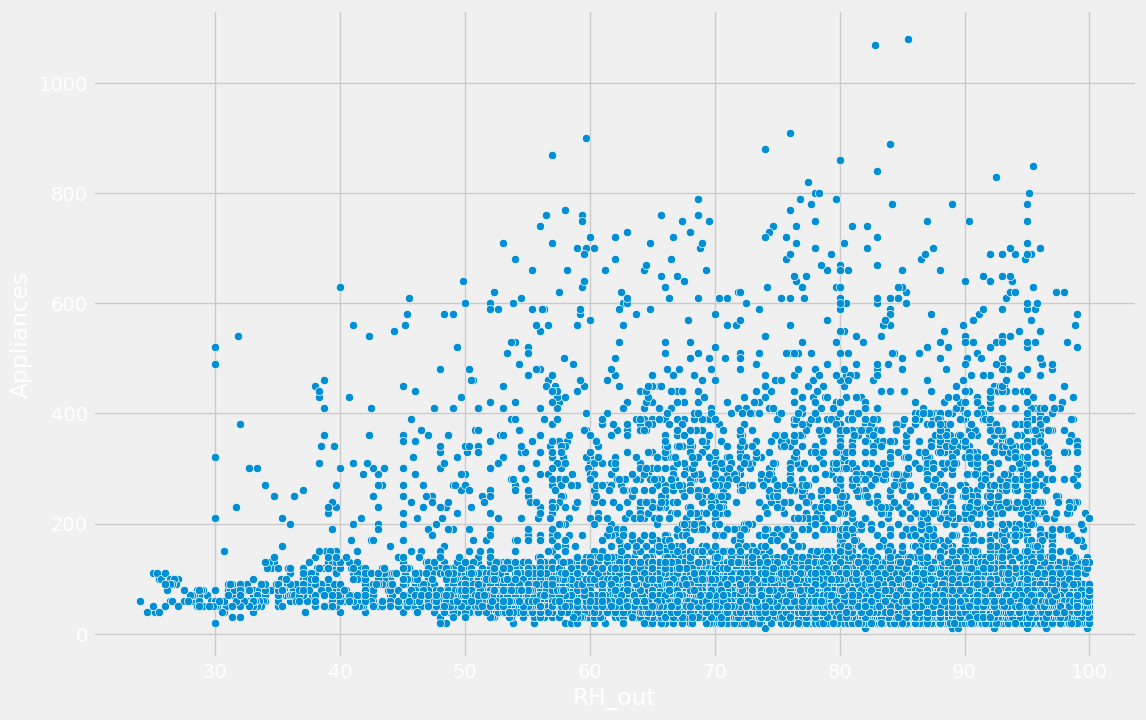

In [52]:
customized_scatterplot(Energy_wo_date.Appliances, Energy_wo_date.RH_out)

 We see that light is a categorical variable, we drop  the light column as stated in the questions, train and then transform the other features so that they can be follow the assumptions of the linear models which incudes
* Linearity: That is the relationship between the variables must be linear
* Homoscedasticity: The residues or prediction errors should have equal or constant variance
* Normailty: They should follow a normal distribution
* Independence: Each feature must independent of each other


In [53]:
Main_data=Energy_wo_date.drop('lights', axis=1)
Main_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.530000,6.60,733.500000,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.560000,6.48,733.600000,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.500000,6.37,733.700000,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.400000,6.25,733.800000,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.89,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.400000,6.13,733.900000,92.0,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,100,26.10,42.800000,26.760000,38.090000,29.100000,38.238571,25.680000,42.116000,24.290000,...,24.500000,42.395714,23.10,747.933333,45.0,6.666667,40.000000,10.5,18.363029,18.363029
17705,200,26.10,42.363333,26.700000,38.090000,28.997143,37.582857,25.600000,42.000000,24.290000,...,24.500000,42.220000,23.10,747.966667,45.0,6.833333,40.000000,10.5,21.670478,21.670478
17706,350,26.10,42.030000,26.566667,38.060000,28.700000,37.036000,25.600000,41.960000,24.290000,...,24.500000,41.782857,23.10,748.000000,45.0,7.000000,40.000000,10.5,49.184282,49.184282
17707,300,26.10,41.745000,26.500000,38.000000,28.765714,37.422857,25.600000,41.805714,24.290000,...,24.500000,42.580000,23.10,748.016667,45.0,7.000000,40.000000,10.5,21.225869,21.225869


 Fitting a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P


In [56]:
Simple_linear=Main_data[['T2','T6']].sample(1000,random_state=2)

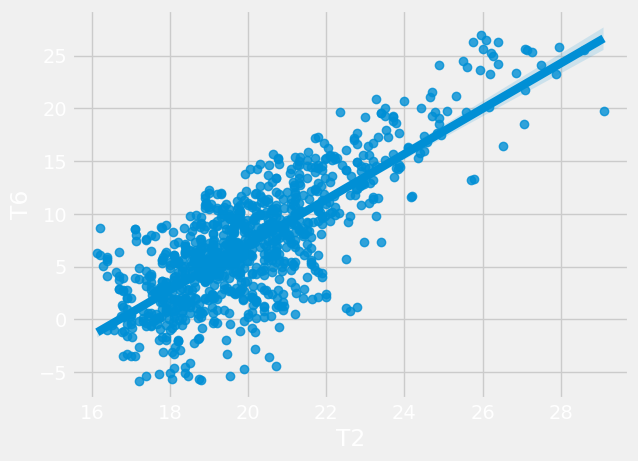

In [62]:
l_model=sns.regplot(x='T2', y='T6',data= Simple_linear)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()
normalised_energy  = pd.DataFrame(scaler.fit_transform(Main_data), columns = Main_data.columns)
features_energy = normalised_energy.drop(columns=['Appliances'])
heating_target=normalised_energy['Appliances']

In [93]:
scaler = MinMaxScaler()
normalised_energy  = pd.DataFrame(scaler.fit_transform(Main_data), columns = Main_data.columns)
features_energy = normalised_energy.drop(columns=['T6','T2'])
heating_target=normalised_energy['T6']

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_energy,heating_target,test_size=0.3, random_state=1)

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [96]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [97]:
predicted_values=linear_model.predict(x_test)

In [98]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae,3)

0.023

In [99]:
from sklearn.metrics import mean_squared_error
me = mean_squared_error(y_test,predicted_values)
round(me,3)

0.001

In [ ]:
## Visualizing 

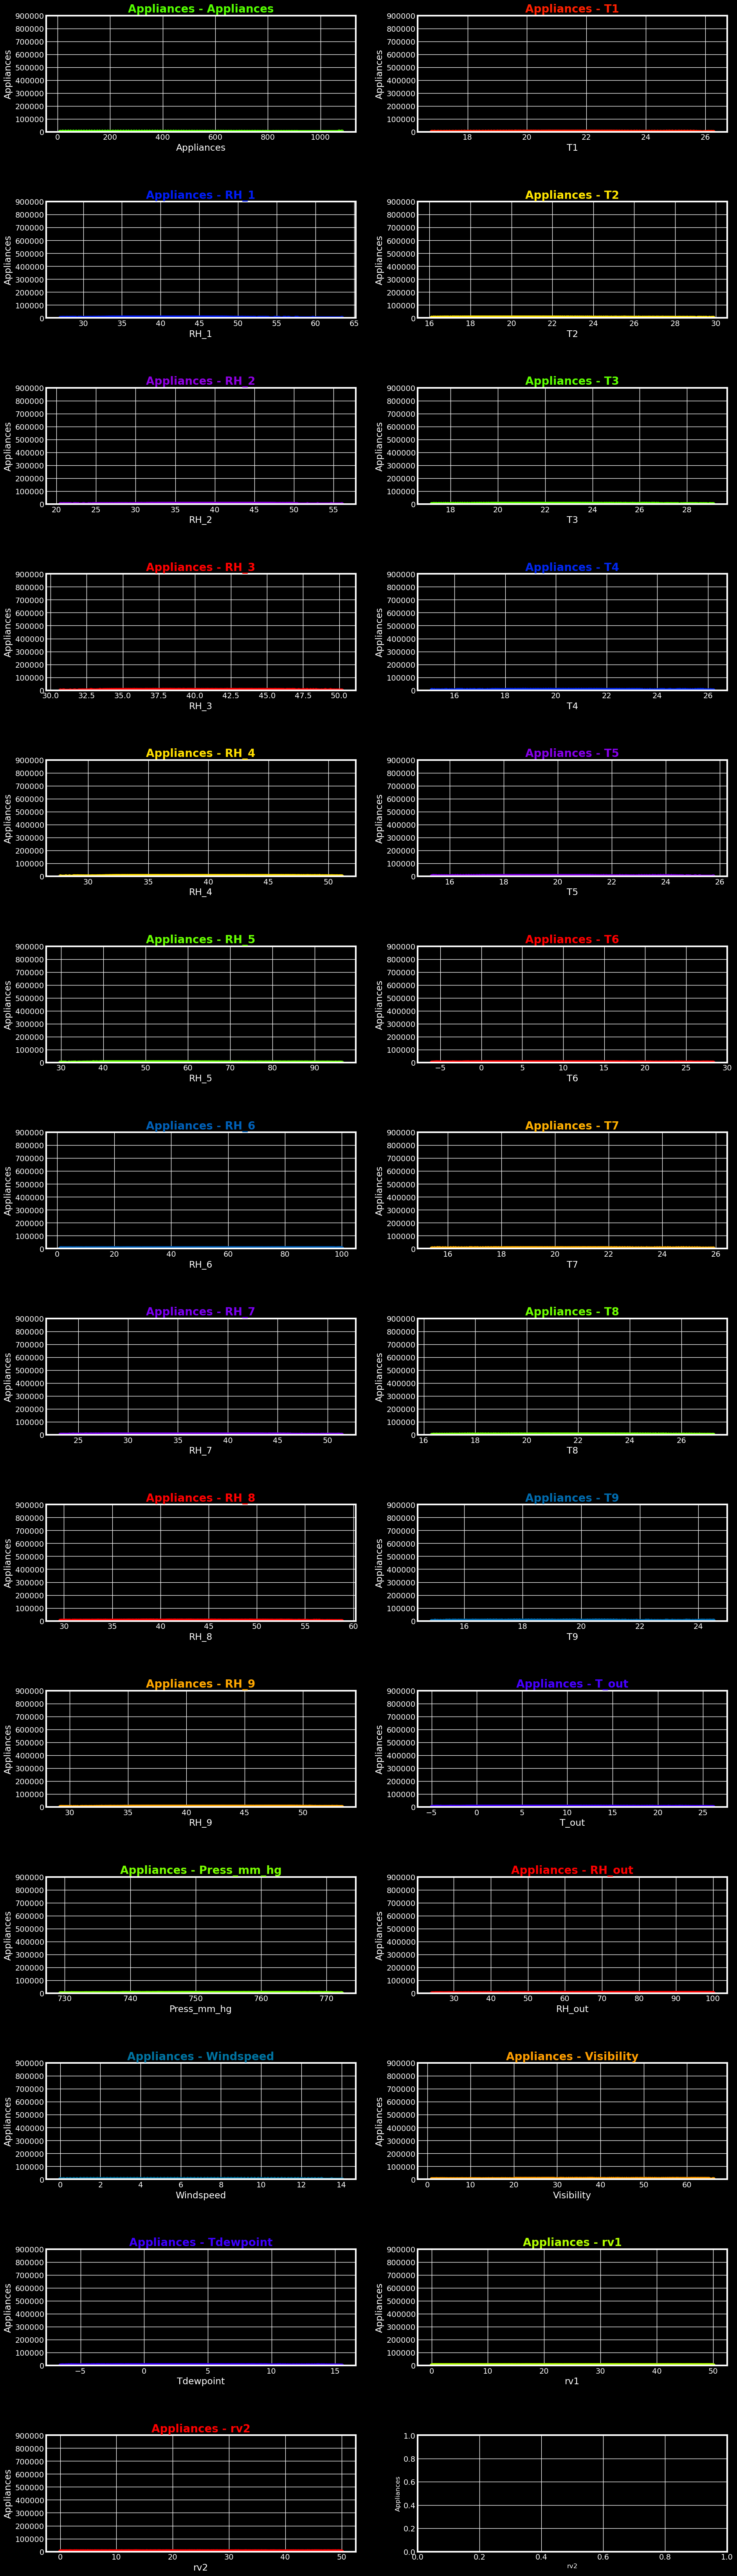

In [100]:
plt.style.use('dark_background')
fig, axes = plt.subplots(14, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(Main_data.columns))]
for i,ax,color in zip(Main_data.columns,axes.flatten(),colors):
    sns.regplot(x=Main_data[i], y=Main_data["Appliances"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Appliances',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('Appliances'+' - '+str(i),color=color,fontweight='bold',size=20)
plt.show()
     

In [102]:
## transforming the target variables
Main_data['Appliances_Log1p'] = np.log1p(Main_data.Appliances)

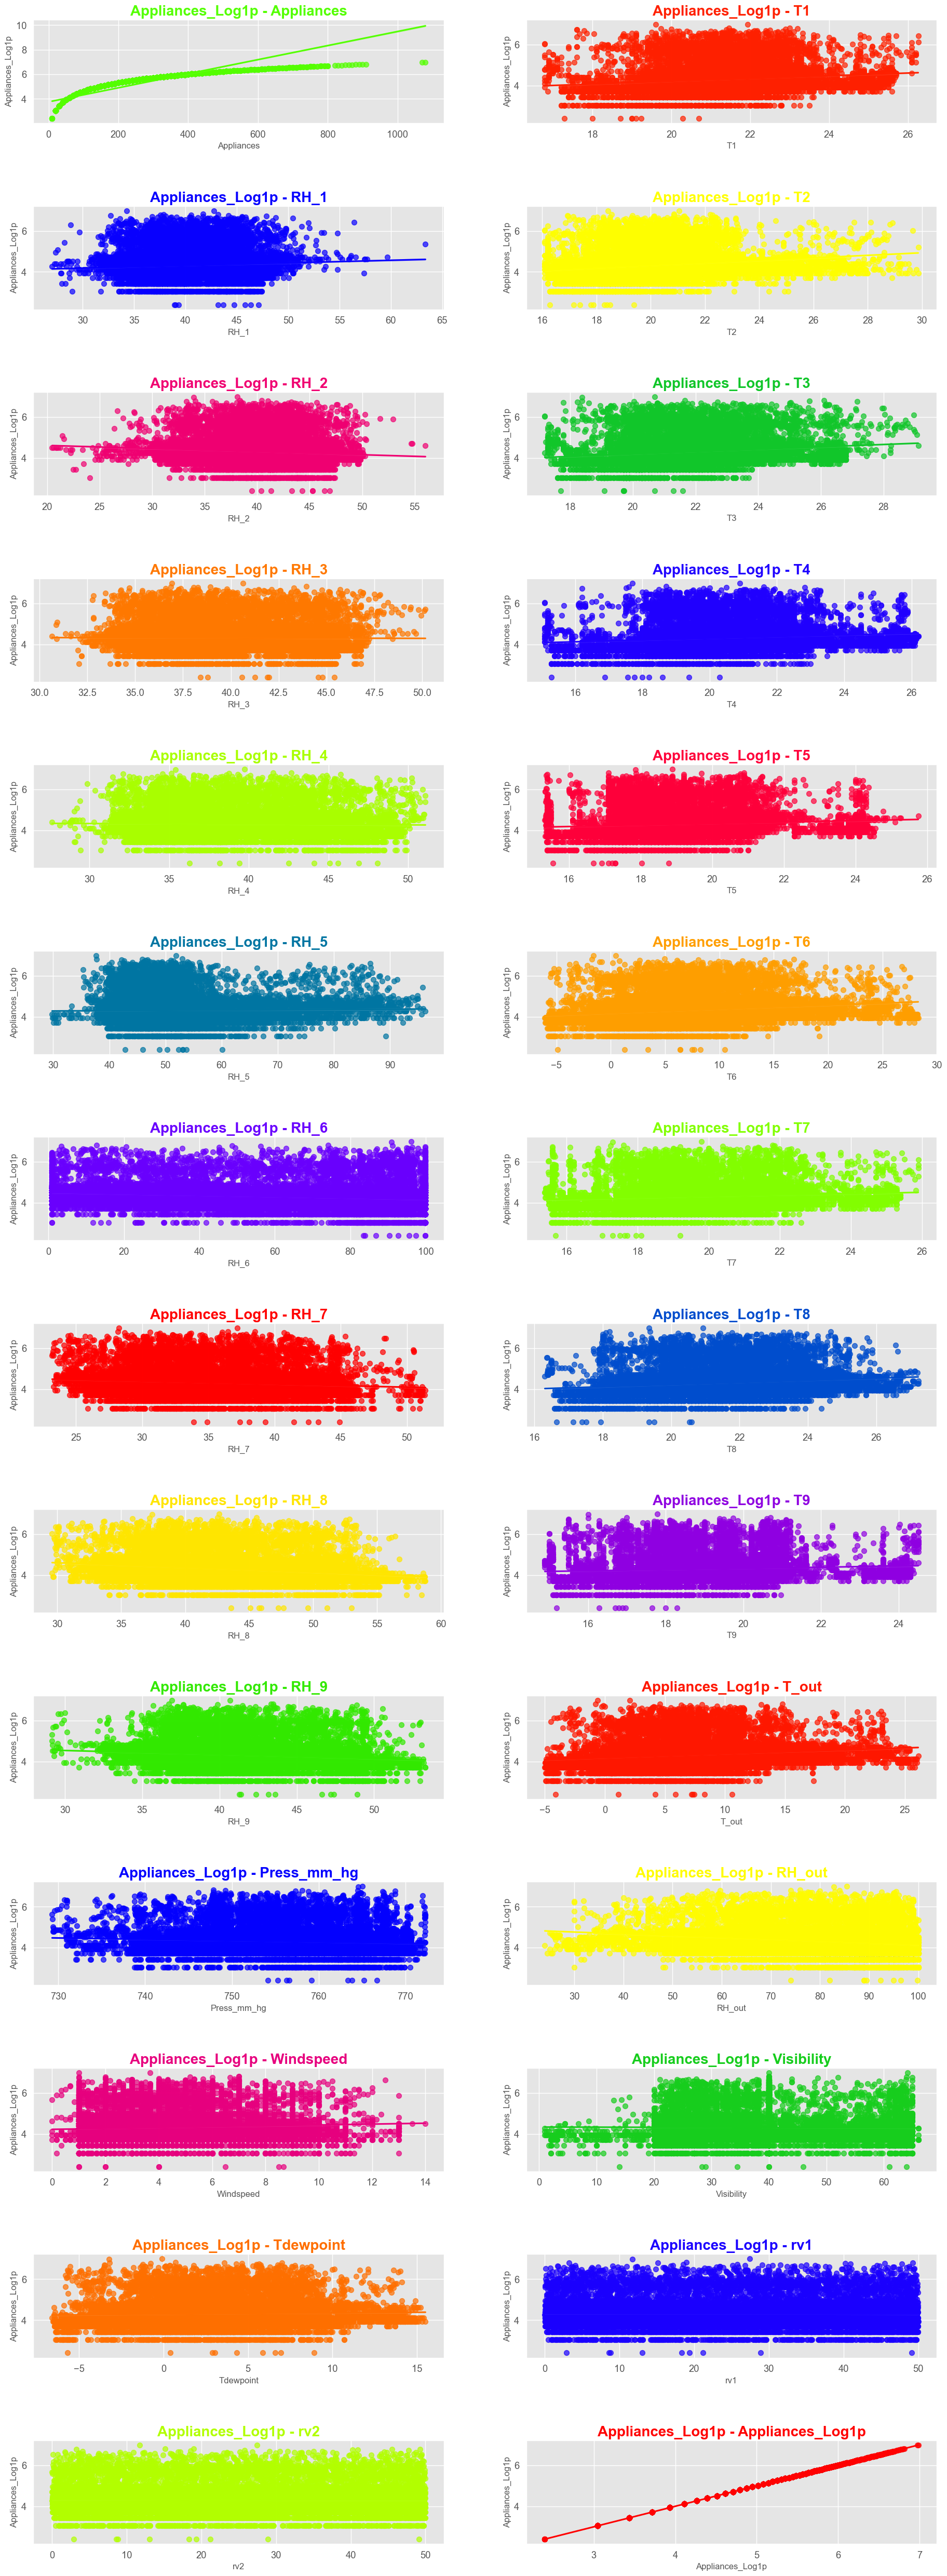

In [103]:
### visualizing the regression plots
plt.style.use('ggplot')
fig, axes = plt.subplots(14, 2,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)
sns.set(font_scale=1.2)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(Main_data.columns))]
for i,ax,color in zip(Main_data.columns,axes.flatten(),colors):
    sns.regplot(x=Main_data[i], y=Main_data["Appliances_Log1p"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.7},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Appliances_Log1p',fontsize=12)
    ax.set_title('Appliances_Log1p'+' - '+str(i),color=color,fontweight='bold',size=20)
plt.show()     